### ReadMe

This notebook is based on the previous one, and it is a first full version of data preprocessing. Notice that, here, only 21 kinds of animals are considered, the raw samples are extends to 10,000 images in all.

The final version of data is presented in dataframe and it can be converted into **np.array** if necessary.

There are two types of data:
+ Tensor form: data are wrapped into tensor form, i.e. high-dimensional vector
+ Vector form: data are wrapped into matrix form, i.e. 2-d array


#### About saving to disc.
The data after preprocessing has been formulated into .csv file(default setting)

The observation in dataframe(.csv file) will be something looking like:

Tensor format:

               RGB-data of image                             |                             Label
    np.array([[[R1,G1,B1],[R2,G2,B2],...]])                  |                              ant
    
Matrix form:

               RGB-data of image                             |                             Label
    np.array([[R1,...],[G1,...],[B1,...]])                   |                              ant


In [ ]:
##run this cell if libraries are not installed
##if environment varies, please use Linux or Anaconda Navigator to install libraries for convenience
#!pip install Pillow
#!pip install Augmentor
#!pip install itertools

In [1]:
####import library
import numpy as np
import pandas as pd   
import Augmentor     #for image generation
from PIL import Image # from image to vector
import matplotlib.pyplot as plt
import seaborn as sns  # for beautiful images!

%matplotlib inline

_____
### generating image samples:
size: 96 * 96
### resample technique:
 1. size preserving rotating
 2. flip
 3. elastic distortions
 4. perspective transforms
 5. size preserving shearing
 6. random erasing



In [2]:
import os
os.getcwd()

'C:\\Users\\91592\\Dropbox\\Project 479\\caltech101'

In [3]:
cd 101_ObjectCategories/

C:\Users\91592\Dropbox\Project 479\caltech101\101_ObjectCategories


In [7]:
path_to_file = os.getcwd()

p = Augmentor.Pipeline(path_to_file) ##other command can be implemented to avoid saving files to local disc

Initialised with 1936 image(s) found.
Output directory set to C:\Users\91592\Dropbox\Project 479\caltech101\101_ObjectCategories\output.

In [9]:
# Resize all images
p.resize(probability=1, width=96, height=96)

# Add some operations to an existing pipeline.

# add a horizontal flip operation to the pipeline:
p.flip_left_right(probability=0.4)

# add a vertical flip operation to the pipeline:
p.flip_top_bottom(probability=0.8)

# Add a rotate90 operation to the pipeline:
p.rotate90(probability=0.1)

# Add a random distortions
p.random_distortion(probability=0.4,  grid_width =4 , grid_height =4 , magnitude =5)

# Add a random erasing
p.random_erasing(probability=0.1, rectangle_area=0.2)

# Add a perspective transform
p.skew(probability=0.3, magnitude=0.2)

# Add a size preserving shearing
p.shear(probability=0.3, max_shear_left=10, max_shear_right=10)

# Here we sample 10,000 images from the pipeline.

# It is often useful to use scientific notation for specify
# large numbers with trailing zeros.
num_of_samples = int(1e4)

# Now we can sample from the pipeline:
p.sample(num_of_samples)

Processing <PIL.Image.Image image mode=RGB size=96x96 at 0x1C0401333C8>: 100%|█| 10000/10000 [01:36<00:00, 103.56 Samples/s]


In [10]:
cd ..

C:\Users\91592\Dropbox\Project 479\caltech101


In [11]:
cd 101_ObjectCategories/output/

C:\Users\91592\Dropbox\Project 479\caltech101\101_ObjectCategories\output


In [12]:
cd bass/

C:\Users\91592\Dropbox\Project 479\caltech101\101_ObjectCategories\output\bass


### Images after augmentor's processing

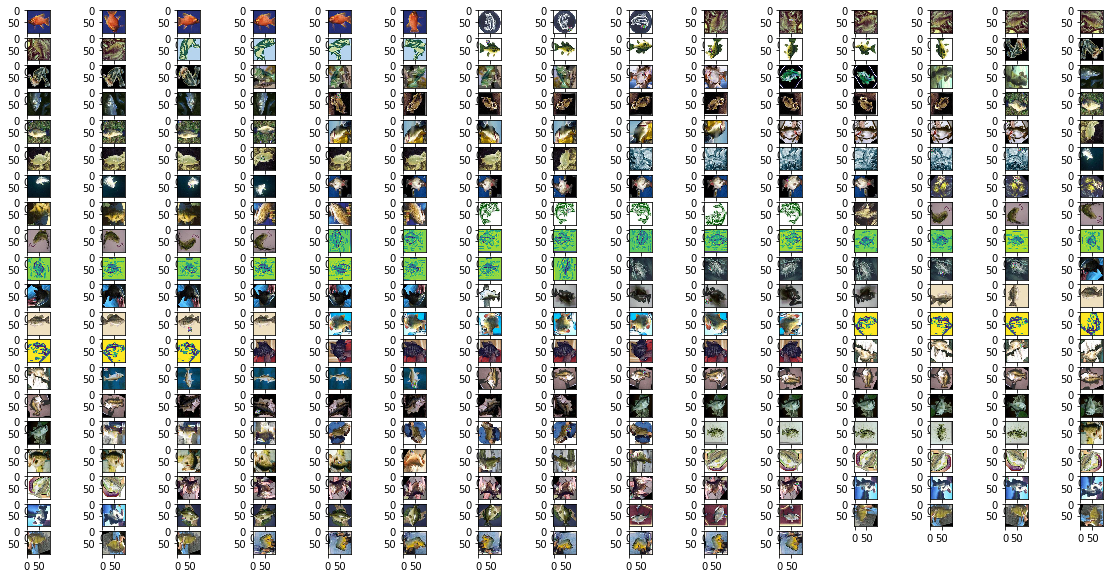

In [19]:
#import glob
import matplotlib.image as mpimg

images = []  ##lovely bass! A kind of fish~~~
for img_path in os.listdir():
    images.append(mpimg.imread(img_path))
    
plt.figure(figsize = (20,10))
columns = 15
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i+1)
    plt.imshow(image)

________________
### From Images to Tensors/vectors

+ training first model: naive-kNN
  + using matrix(vector) format data
  + With naive classification criteria: minkovski norm or other norm between two points
  + No image segmentation
  
+ training first model: a more complicated k-NN
  + another idea of calculating similarity of two images
  + add image segmentation if possible

In [20]:
os.getcwd()

'C:\\Users\\91592\\Dropbox\\Project 479\\caltech101\\101_ObjectCategories\\output\\bass'

In [21]:
cd ..

C:\Users\91592\Dropbox\Project 479\caltech101\101_ObjectCategories\output


In [6]:
# From images to vetors
def image_2_array(image_filename): 
    """
        This function is to transfer image into corresponding vector of form:
    RGB-data of image                                     |                           Label
    np.array([[R1,...],[G1,...],[B1,...]])                |                            ant
    """
    
    image = Image.open(image_filename)
    image.load()
    data = np.asarray(image, dtype = np.float) #also np.int32
    if(len(data.reshape(-1))%3 != 0): #data may have some error
        return np.nan
    else:
        vectorized_data = data.reshape(-1)#because we have three channels for each image!
        channel_1 = vectorized_data[::3]
        channel_2 = vectorized_data[1::3]
        channel_3 = vectorized_data[2::3]
        return(np.array([channel_1, channel_2, channel_3]))
    
## An alternative function for processing tensors:
# def image_2_array(image_filename): 
#     ##This function is to transfer image into corresponding vector of form:
#     ##RGB-data of image                                     |                           Label
#     np.array([[[R1,G1,B1],[R2,G2,B2],...]])                  |                          ant
    
#     image = Image.open(image_filename)
#     image.load()
#     data = np.asarray(image, dtype = np.float)
#     if(len(data.reshape(-1))%3 != 0): #data may have some error
#         return np.nan
#     else:
#         return(data)
##-------------------------------------------------------------------------------
    
def read_oneGeneric_file(filename):
    """
        This function is to apply the first function to one generic image
    say, transfer all bass(a kind of fish) images into vector form
    """

    allFiles = os.listdir(filename)
    arrayed_images_oneGeneric = [] #create an empty list to hold matrix of one generic data
    count = 0
    labelname = filename.split("//")[1]
    for f in allFiles:
        f = filename + "/" + f
        arrayed_images_oneGeneric.append(image_2_array(f))
        count += 1
    return arrayed_images_oneGeneric, labelname, count #can be modified, count or labelname etc. can be omitted in output
##-----------------------------------------------------------------------------


def read_wholeGenericFile(whole_generic_filename):
    """
        This function is to apply the first function to all generic images
    say, transfer all 21 kinds animals' images into vector form
    """

    allGenericFilename = os.listdir(whole_generic_filename)

    oneGeneric_file_path = []
    
    for oneGeneric_file in allGenericFilename:
        oneGeneric_file = whole_generic_filename + "/" + oneGeneric_file
        oneGeneric_file_path.append(oneGeneric_file)
        
    return(oneGeneric_file_path)
##------------------------------------------------------------------------------

def with_all_2_df(oneGeneric_file_path):
    """
     This function is to generate a dataframe to save vetors processed by read_wholeGenericFile() function
    """
   
    df_wholeGeneric = pd.DataFrame({"non_divided_channel": [], 
                                    "label_name": []})
    
    for file_path in oneGeneric_file_path:
        oneGeneric_data, oneGeneric_label, oneGeneric_count = read_oneGeneric_file(file_path)
        df_temp = pd.DataFrame({"non_divided_channel": oneGeneric_data, 
                                    "label_name": [oneGeneric_label]*oneGeneric_count})
        df_wholeGeneric = pd.concat([df_wholeGeneric, df_temp], ignore_index=True)
    
    return df_wholeGeneric

In [7]:
cd ..

C:\Users\91592\Dropbox\Project 479\caltech101\101_ObjectCategories


In [8]:
oneGeneric_file_path = read_wholeGenericFile("output/")
df_selected_animals_21 = with_all_2_df(oneGeneric_file_path)

In [9]:
df_selected_animals_21.head(7)

,non_divided_channel,label_name
0,"[[185.0, 184.0, 184.0, 186.0, 189.0, 190.0, 19...",ant
1,"[[14.0, 15.0, 17.0, 22.0, 25.0, 26.0, 25.0, 25...",ant
2,"[[161.0, 165.0, 165.0, 163.0, 163.0, 166.0, 16...",ant
3,"[[95.0, 109.0, 124.0, 128.0, 130.0, 133.0, 139...",ant
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",ant
5,"[[7.0, 6.0, 4.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",ant
6,"[[3.0, 4.0, 3.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",ant


In [ ]:
##save to xls or csv file as you like!
##coding here

____________________
### Encoding label and spliting dataset into traing dataset and testing dataset
Target:
+ k-NN with Euclidean norm
+ k-NN with another kind of norm

In [10]:
##Encoding labels
d = {}
label_num = 1
for obj in np.unique(df_selected_animals_21['label_name']):
    d[obj] = label_num
    label_num+=1

df_selected_animals_21['label_num'] = df_selected_animals_21['label_name'].map(d)

In [11]:
df_selected_animals_21.head(7)

,non_divided_channel,label_name,label_num
0,"[[185.0, 184.0, 184.0, 186.0, 189.0, 190.0, 19...",ant,2
1,"[[14.0, 15.0, 17.0, 22.0, 25.0, 26.0, 25.0, 25...",ant,2
2,"[[161.0, 165.0, 165.0, 163.0, 163.0, 166.0, 16...",ant,2
3,"[[95.0, 109.0, 124.0, 128.0, 130.0, 133.0, 139...",ant,2
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",ant,2
5,"[[7.0, 6.0, 4.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",ant,2
6,"[[3.0, 4.0, 3.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",ant,2


In [12]:
df_selected_animals_21['naive_X'] = df_selected_animals_21['non_divided_channel'].apply(lambda x: x.reshape(-1))
df_selected_animals_21['len_data'] = df_selected_animals_21['naive_X'].apply(lambda x:len(x))
np.unique(df_selected_animals_21['len_data'])

array([ 9216, 27648], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split

X = df_selected_animals_21[df_selected_animals_21['len_data']!=9216]['naive_X']
y = df_selected_animals_21[df_selected_animals_21['len_data']!=9216]['label_num']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3,
                                                   random_state = 123,
                                                   shuffle = True,
                                                   stratify = y)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

naive_knn = KNeighborsClassifier(n_neighbors = 3,
                                weights = "uniform",
                                algorithm = 'kd_tree',
                                leaf_size = 30,
                                p = 2,
                                metric = 'minkowski')

naive_knn.fit(list(X_train), y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [17]:
y_predict_naive_knn = naive_knn.predict(list(X_test))

Normalized confusion matrix


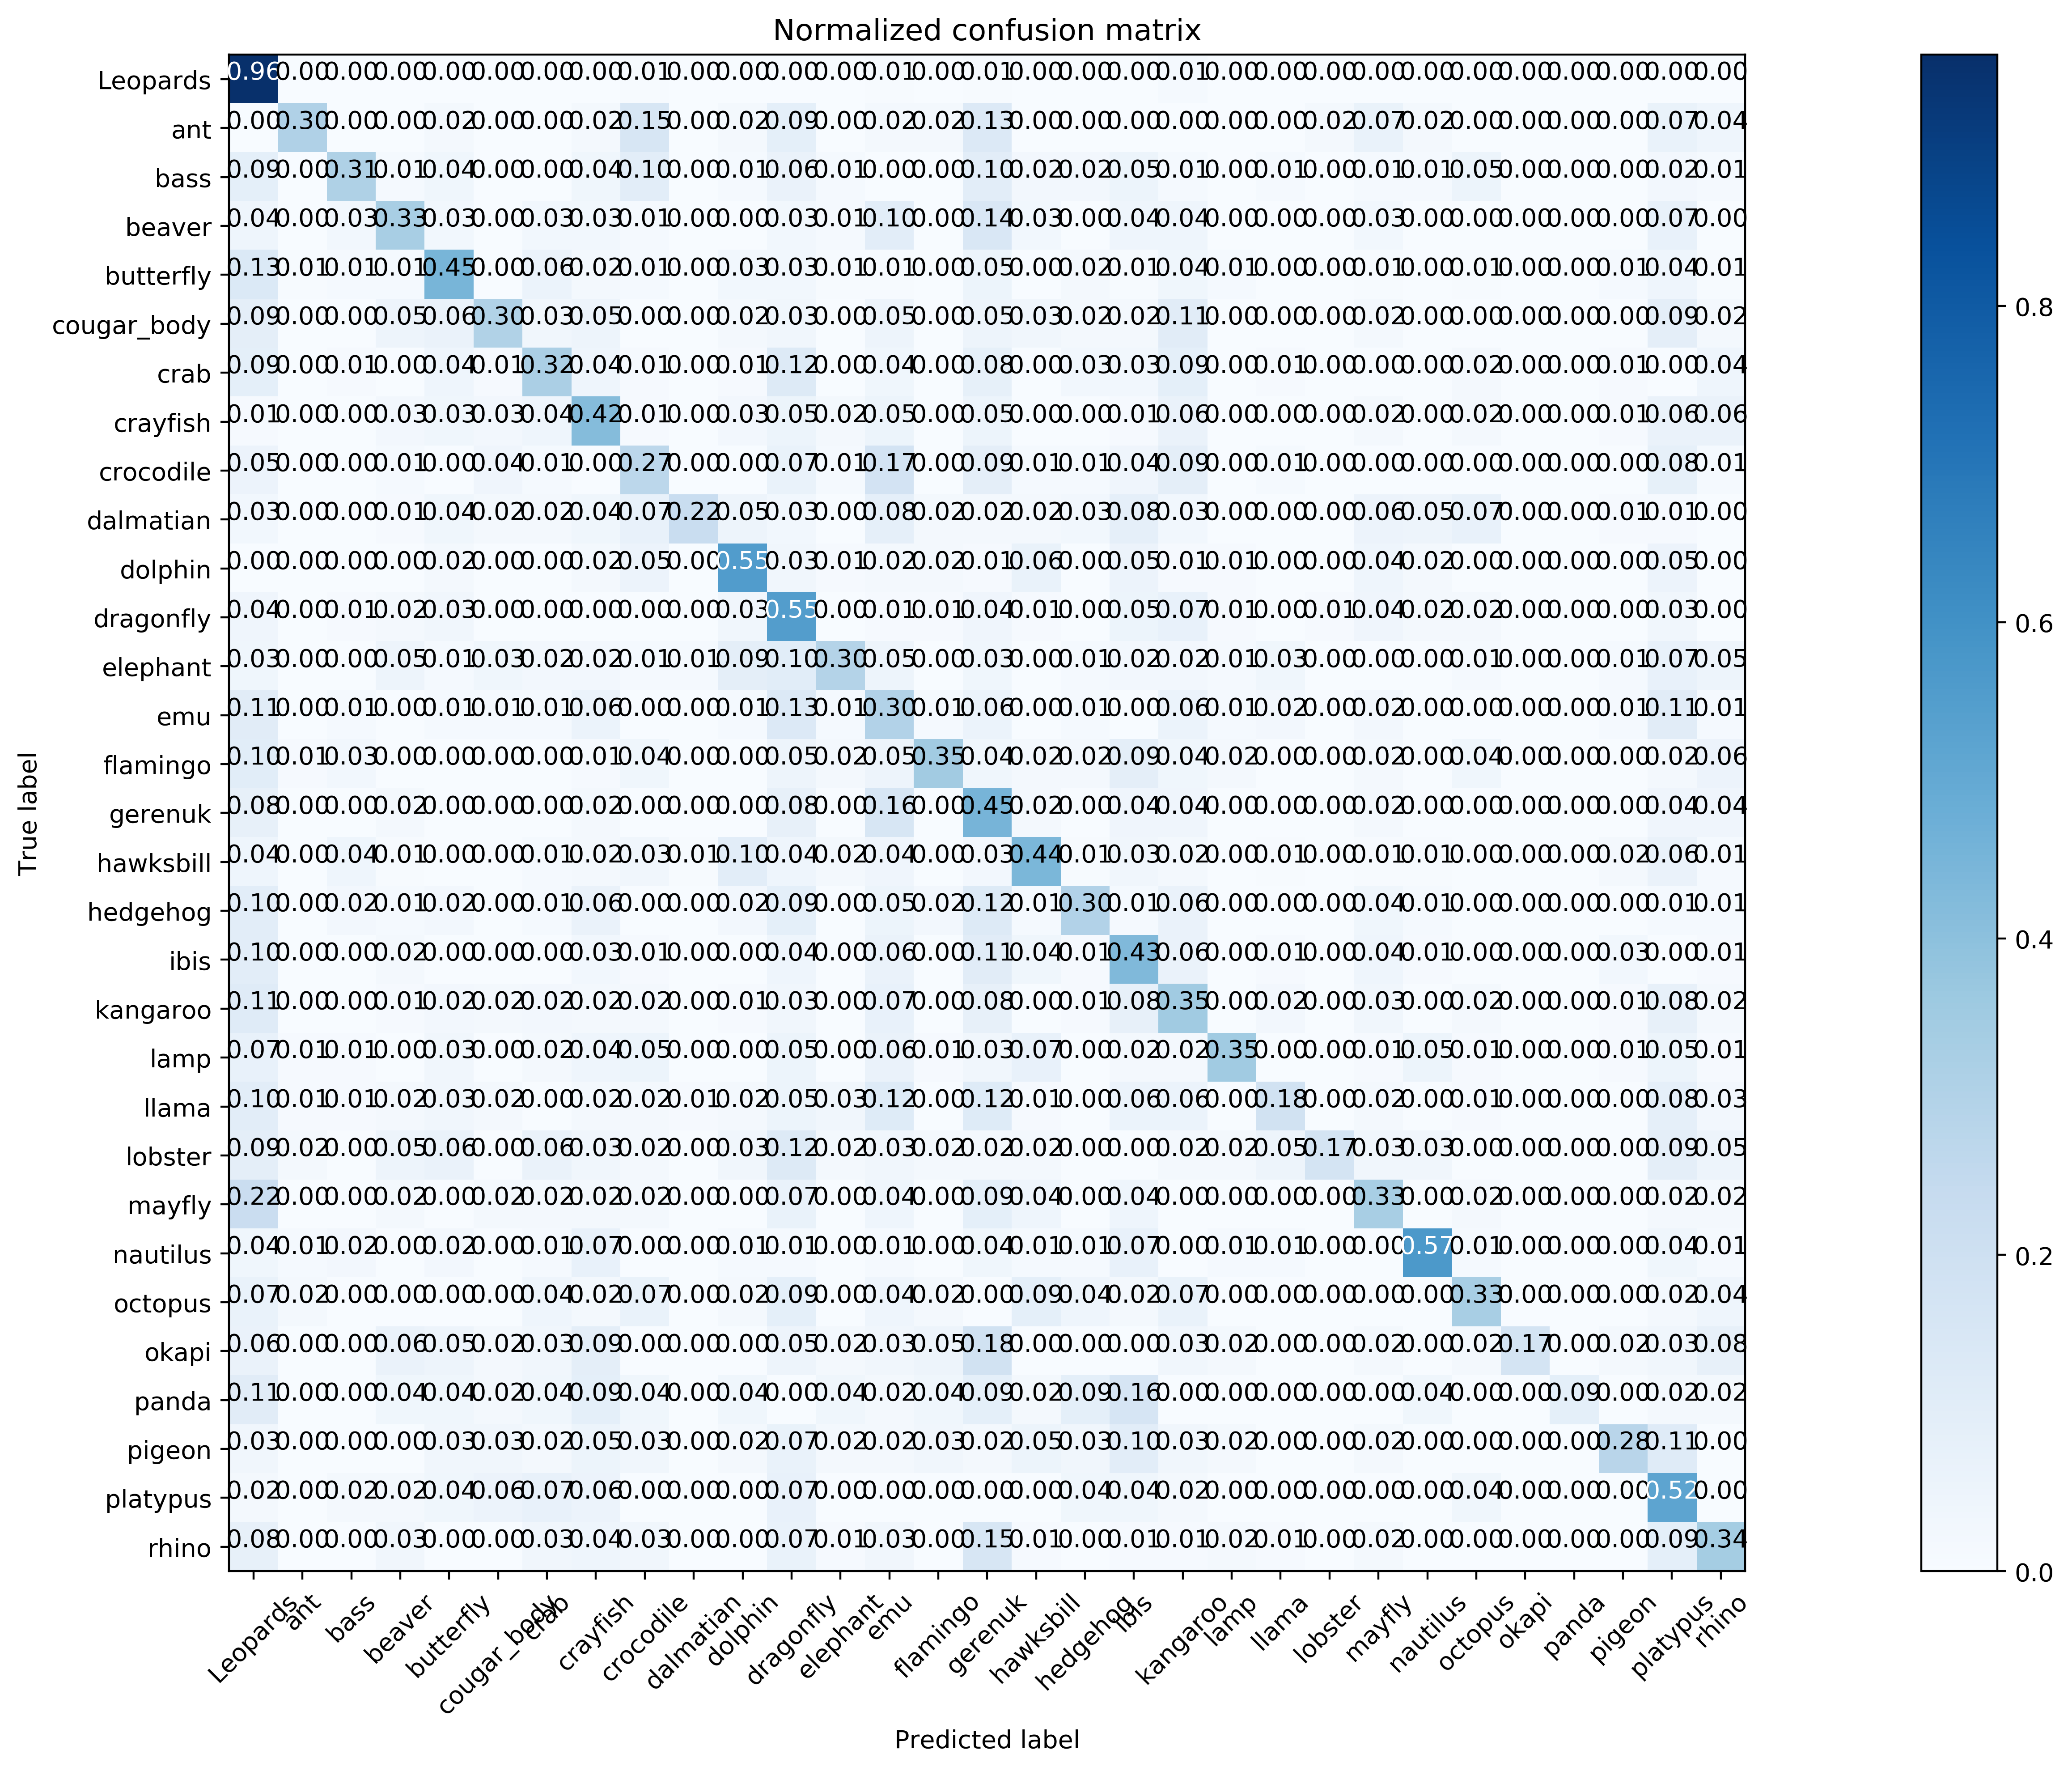

In [20]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

#def class_name
class_names = np.unique(df_selected_animals_21['label_name'])
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict_naive_knn)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize = (20,10), dpi = 400)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

_______________